<a href="https://colab.research.google.com/github/RiyaParikh0112/Synthetic-Fashion-GAN/blob/main/Fashion_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
# importing tensorflow datasets and other dependencies
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCCNN1G/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteCCNN1G/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
type(ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [7]:
#we will get a dictionary
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [8]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

# Visualizing the Data and Build Dataset

In [9]:
import numpy as np

In [10]:
#setting up a iterator --> setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [11]:
#getting data into the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

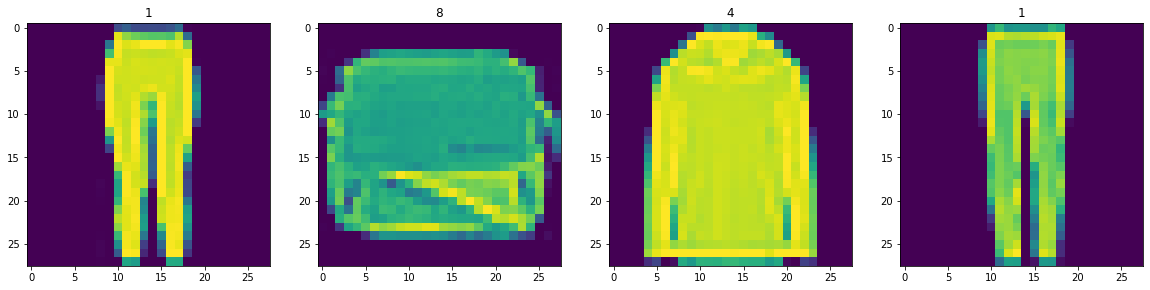

In [12]:
#create some subplots

fig,axis =plt.subplots(ncols=4,figsize=(20,20))
for index in range(4):
  batch = dataiterator.next()
  axis[index].imshow(np.squeeze(batch['image']))
  axis[index].title.set_text(batch['label'])

In [13]:
#as the images are represented as values between 0 and 255 we would want to scale them between 0 and 1 to build a good ML model
# scale and return images only
def scale_images(data):
  image = data['image']
  return image/255

**Creating A Data Pipeline for Tensorflow**

1. Map
2. Cache
3. Batch
4. Prefetch

In [14]:
ds = tfds.load('fashion_mnist',split = 'train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
#cache the dataset for that batch
ds = ds.cache()
#shuffle the data
ds = ds.shuffle(60000)
# batch into 128 images per sample
ds = ds.batch(128)
# reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network

1. Import Model Components

In [16]:
# import the sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense, Flatten , Reshape, LeakyReLU, Dropout, UpSampling2D
# Dropout for regularization



2. Build generator

In [17]:
def build_generator():
  model = Sequential()
  # Takes in random values and reshapes it to 7X7X128
  #generated image creation start
  model.add(Dense(7*7*128,input_dim=128))
  #for non linearity
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # Upsampling block 1 
  #double the spatial quality ie 14x14x128
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # model.add(UpSampling2D())
  # model.add(Conv2D(1,5,padding='same'))
  # model.add(LeakyReLU(0.2))

  #upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

 #downsampling block 1 -->Convolutional Block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

 #downsampling block 2 -->Convolutional Block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #conv layer to get to one channel
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [18]:
test_model = build_generator()

In [19]:
# now our task is to get the reshape model size to 28x28x1 as is of the original images
#but as we can see in the summary the model has shape 7x7x128 so there is still work to be done
#it would be done Conv2D and upsampling
# the code is written in the model function itself ^^

In [20]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [21]:
generator = build_generator()

In [22]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [23]:
img = generator.predict(np.random.randn(4,128,1))
img

array([[[[0.4991393 ],
         [0.5024893 ],
         [0.503342  ],
         ...,
         [0.49809152],
         [0.49579865],
         [0.49848458]],

        [[0.4995743 ],
         [0.493907  ],
         [0.49720207],
         ...,
         [0.5009273 ],
         [0.4974226 ],
         [0.49946788]],

        [[0.49208385],
         [0.48431367],
         [0.48308504],
         ...,
         [0.49735585],
         [0.49859655],
         [0.5009364 ]],

        ...,

        [[0.49461323],
         [0.49117896],
         [0.4963572 ],
         ...,
         [0.49878344],
         [0.49985504],
         [0.49899828]],

        [[0.49808076],
         [0.4994021 ],
         [0.504406  ],
         ...,
         [0.49566492],
         [0.49833944],
         [0.50126785]],

        [[0.49966228],
         [0.5014844 ],
         [0.50419587],
         ...,
         [0.49771705],
         [0.49707106],
         [0.49906743]]],


       [[[0.50188327],
         [0.50579655],
         [0.50

In [24]:
img.shape

(4, 28, 28, 1)

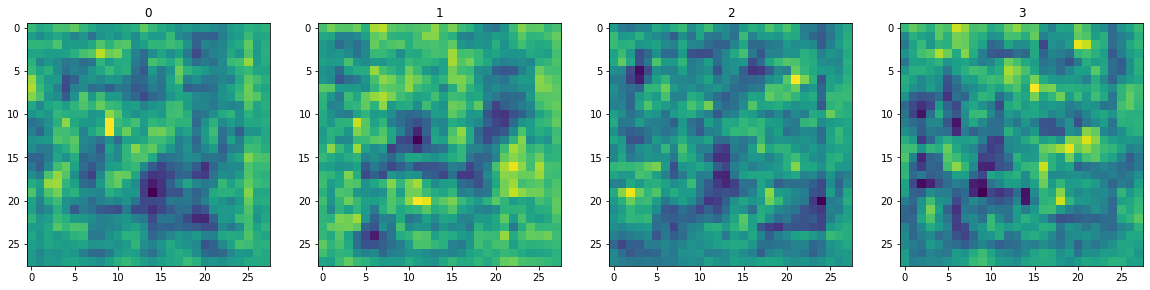

In [25]:
#generate new images
img =generator.predict(np.random.randn(4,128,1))

fig,axis =plt.subplots(ncols=4,figsize=(20,20))
for index , img in enumerate(img):
  
  axis[index].imshow(np.squeeze(img))
  axis[index].title.set_text(index)

3. Build Discriminator

In [26]:
def build_discriminator():
  model = Sequential()

  # Add CNN layer 1
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
   # Add CNN layer 2
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
   # Add CNN layer 3
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
   # Add CNN layer 4
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  


  return model

In [27]:
discriminator = build_discriminator()

In [28]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

1 >> Fake Image

0 >> Real Image

In [29]:
img.shape

(28, 28, 1)

In [30]:
discriminator.predict(np.expand_dims(img,0))

array([[0.49899873]], dtype=float32)

# Construct a Training loop

Losses and Optimisers

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build a SubClassed model

In [33]:
#importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [34]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [35]:
# Creating an instance of our  subclassed model
fashgan = FashionGAN(generator,discriminator)

In [36]:
#compiling the model
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

Build Callback

In [37]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [38]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

Train the Model

In [ ]:
 history = fashgan.fit(ds, epochs=20)
 

Epoch 1/20
469/469 [==============================] - 13178s 28s/step - d_loss: 0.5716 - g_loss: 1.0174
Epoch 2/20
  3/469 [..............................] - ETA: 3:36:23 - d_loss: 0.4953 - g_loss: 2.9139

In [ ]:
#checking the performance
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# Testing the generator


In [ ]:
# generate images
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, axis = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        axis[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
#model saving
generator.save('generator.h5')
discriminator.save('discriminator.h5')